<a href="https://colab.research.google.com/github/MashaKozhevnikova/VLCparking/blob/main/cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Методы отбора релевантных признаков

В наборе данных «data_cancer_1.csv» содержатся характеристики ядер клеток, 
вычисленные на основе оцифрованного изображения новообразования груди.   
Источник данных: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.  
Набор данных Breast Cancer был создан доктором Уильямом Х. Вольбергом, 
врачом из больницы Висконсинского университета в Мэдисоне (штат 
Висконсин, США). Для создания набора данных доктор Вольберг использовал 
образцы жидкости, взятые из новообразований молочных желез, и 
компьютерную программу под названием Xcyt, которая способна выполнять 
анализ цитологических признаков на основе цифрового сканирования. 
Программа использует алгоритм подбора кривой для вычисления десяти 
признаков из каждой клетки в образце, затем вычисляет среднее значение, 
экстремальное значение и стандартную ошибку каждого признака для 
изображения, возвращая вектор с 30 действительными значениями.  
- id - идентификатор пациента 
- diagnosis (M = malignant, B = benign) – диагноз (M – злокачественная опухоль, B – доброкачественная)   


Для каждого ядра клетки вычисляются следующие десять характеристик:   
- radius – радиус 
- texture – текстура 
- perimeter – периметр 
- area – площадь 
- smoothness – гладкость 
- compactness (perimeter^2 / area - 1.0) – компактность 
- concavity – вогнутость (выраженность вогнутых участков контура) 
- concave points – вогнутые точки (количество вогнутых участков 
контура) 
- symmetry – симметрия 
- fractal dimension – фрактальная размерност

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data_cancer_1.csv') # Считываем данные
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Узнаем сколько наблюдений с каждым из диагнозов в данных
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# Перекодируем диагноз 
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1}) 

#### Отбор признаков на основе корреляции

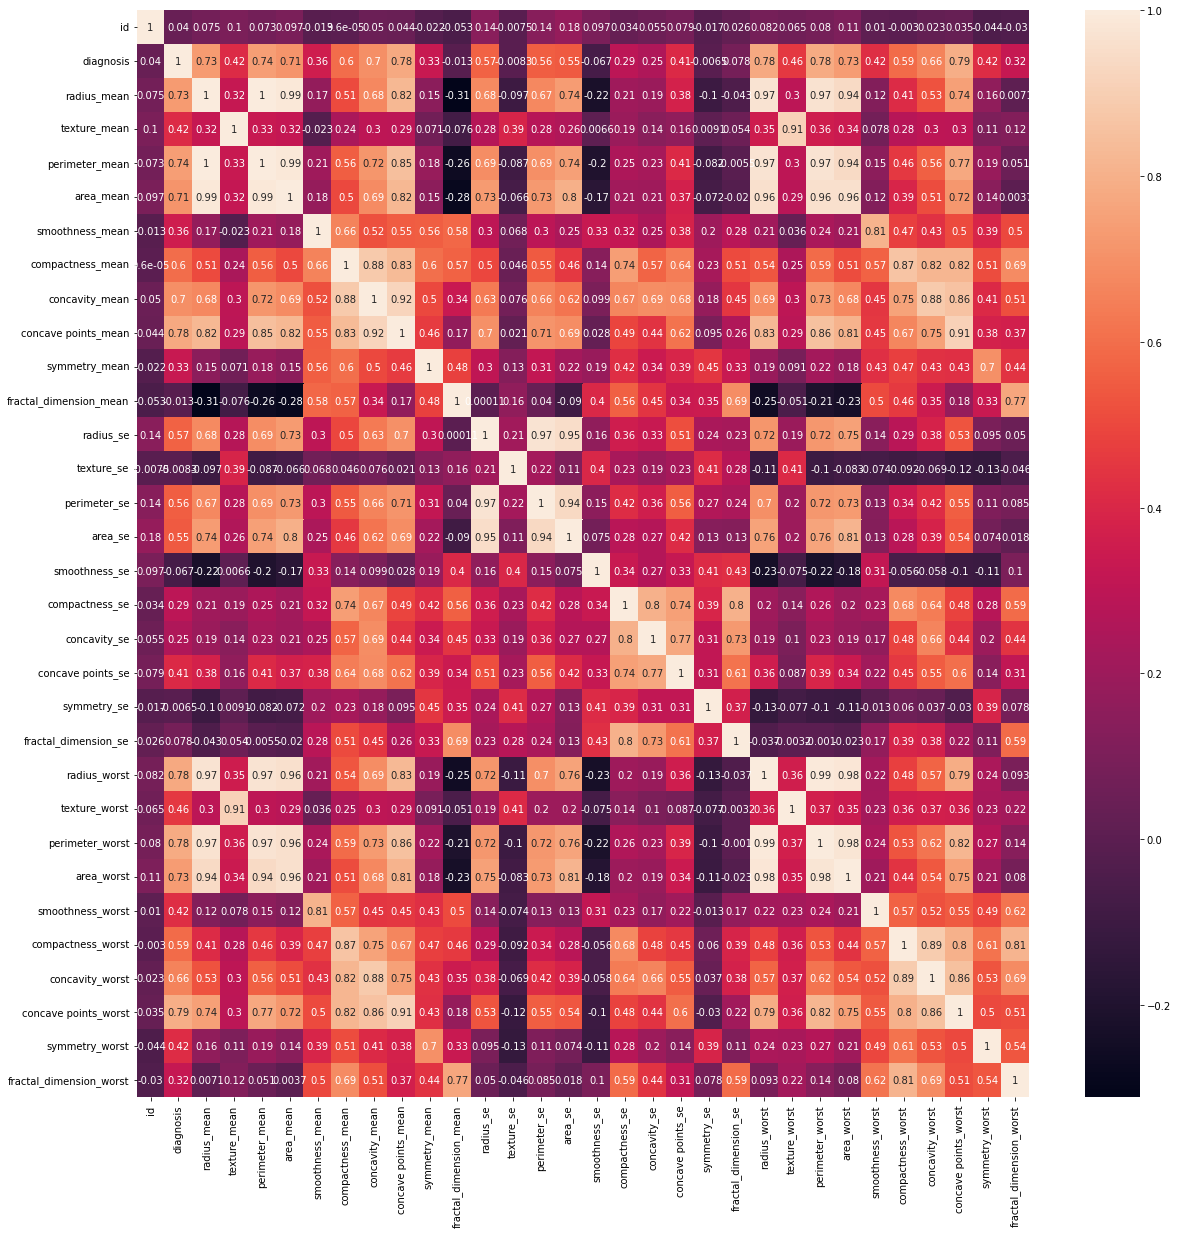

In [ ]:
# Вычислим коэффициенты корреляции

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True) 

#### Какие признаки лучше всего коррелируют с diagnosis?

На тепловой карте характеристической ковариационной матрицы лучше всего коррелируют между собой признаки со светлыми пересечениями и значением, наиболее близким к единице. С diagnosis лучше всего коррелирует concave points mean (0,78), perimeter worst (0,78), radius worst (0,78), concave points worst (0,79).

#### Анализ описательных статистик

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

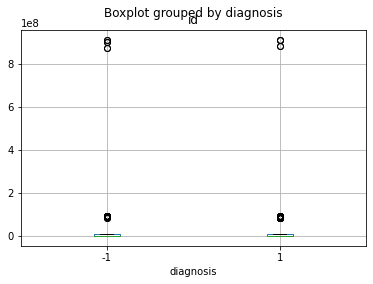

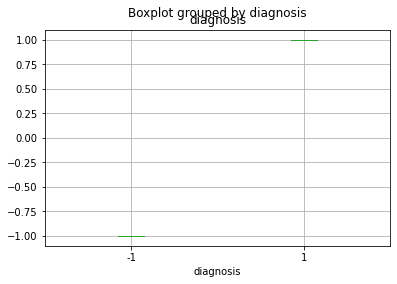

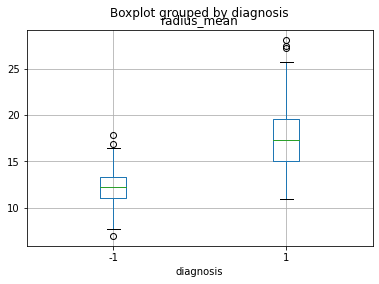

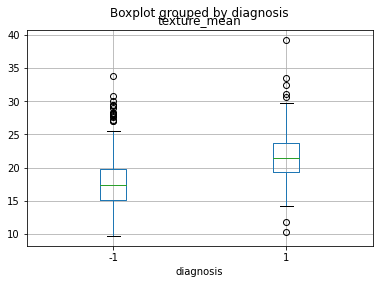

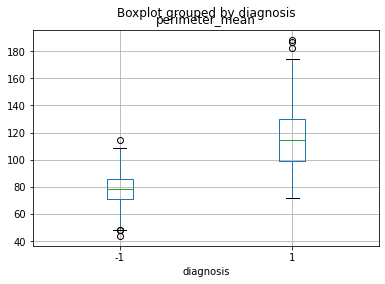

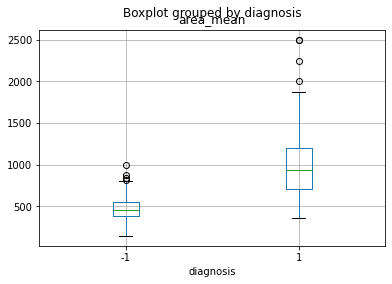

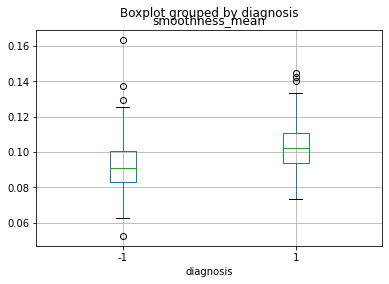

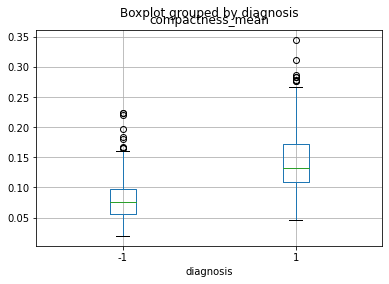

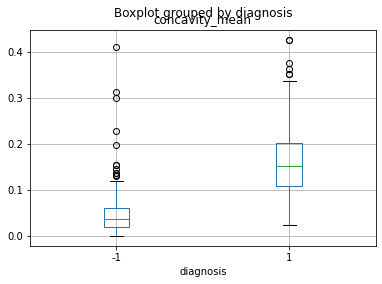

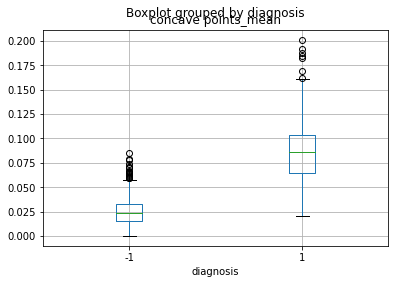

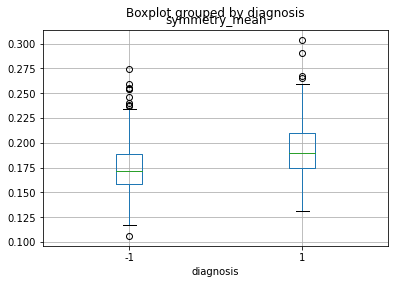

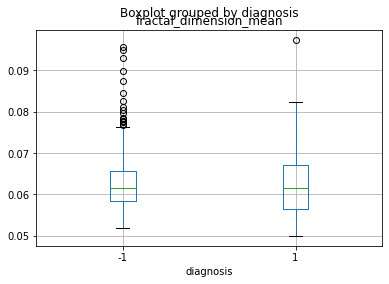

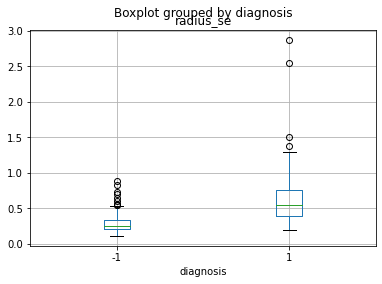

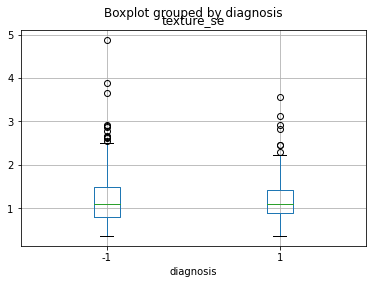

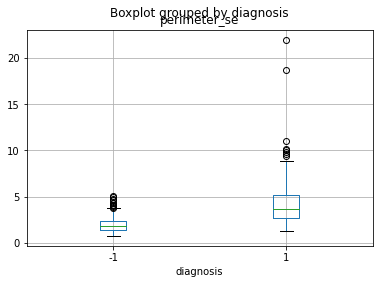

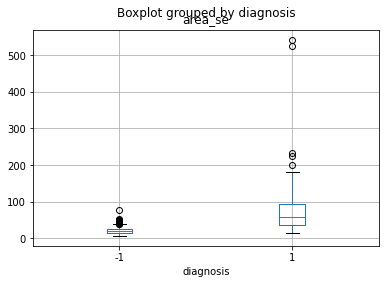

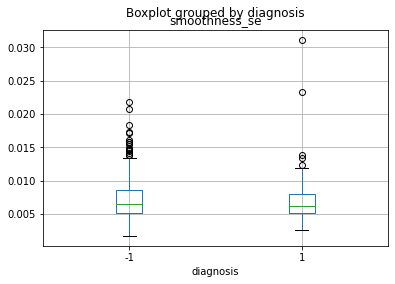

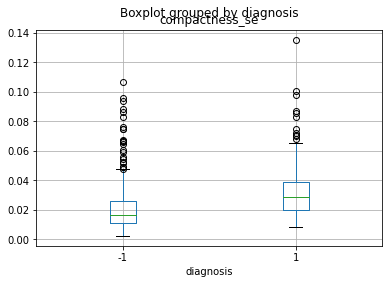

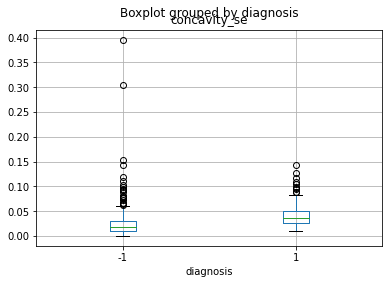

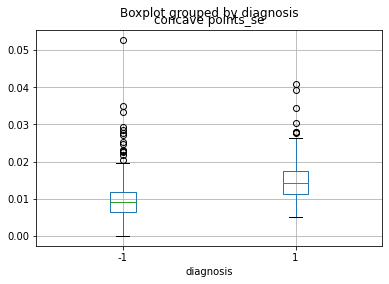

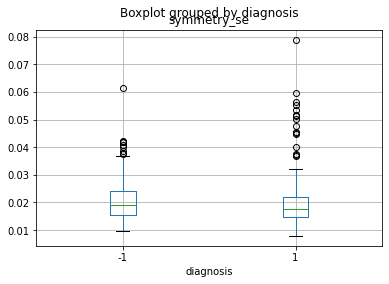

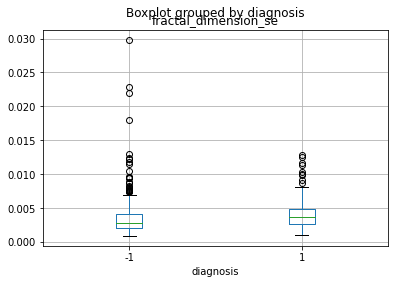

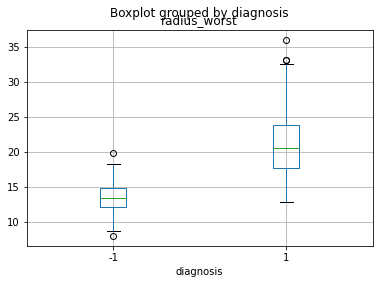

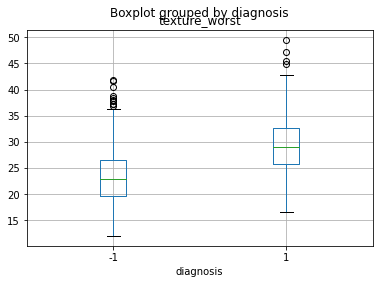

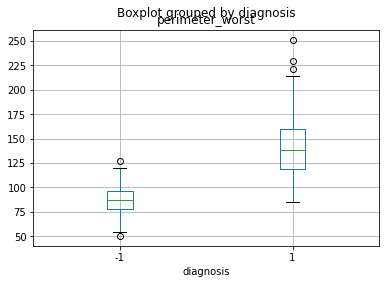

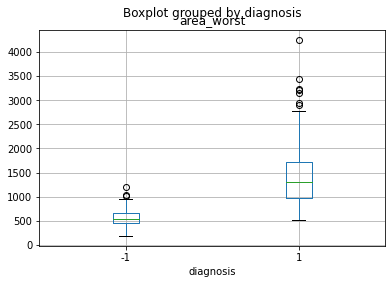

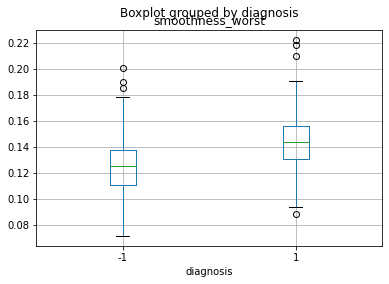

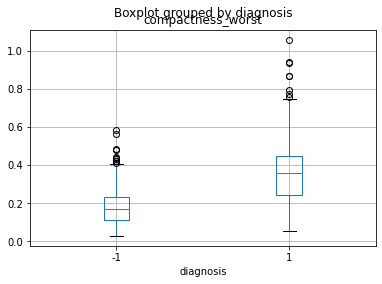

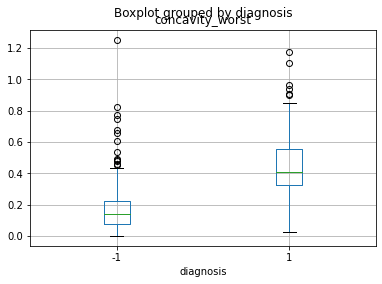

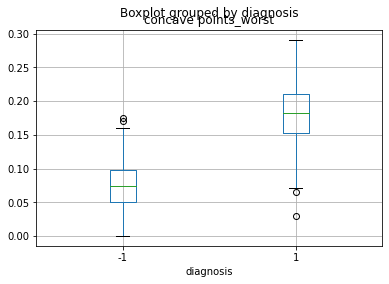

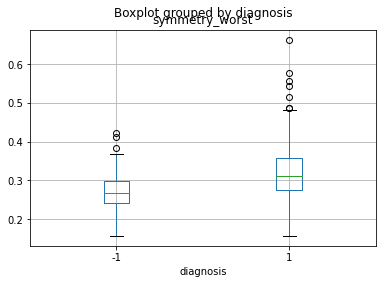

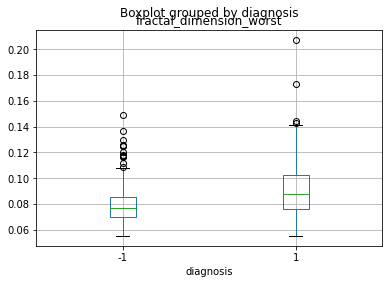

In [ ]:
# Используем диаграммы размаха, чтобы проанализировать принимаемые признаками значения в двух группах (diagnosis = 1 и diagnosis = -1)

for col in df.columns:
    df.boxplot(column = col, by = 'diagnosis')

#### По каким признакам значения в двух группах отличаются?

Значения в двух группах отличаются по всем признакам, кроме id. Однако в некоторых параметрах различия между боксплотами минимальны и, вероятно, не являются статистически значими. Это следующие параметры: fractal_dimension_mean; texture_se; smoothness_se; symmetry_se; fractal_dimension_se.

#### Взаимная информация (Information Gain, Mutual Information)    
В теории вероятностей и теории информации, взаимная информация (MI) двух случайных величин является мерой взаимной зависимости между двумя переменными, MI количественно определяет «количество информации», полученное об одной случайной величине посредством наблюдения за другой случайной величиной. Взаимная информация (MI) между двумя случайными величинами представляет собой неотрицательную величину. MI равен нулю тогда и только тогда, когда две случайные величины независимы, а более высокие значения означают более высокую зависимость.

В sklearn реализована функция mutual_info_classif, которая вычисляет MI для каждой из независимых переменных по отношению к зависимой переменной. 

In [ ]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis'] 

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y) # вычисляем MI

array([0.10652203, 0.36893214, 0.09536483, 0.40363455, 0.36296308,
       0.07811679, 0.21226012, 0.37512016, 0.4412372 , 0.06560413,
       0.00845408, 0.24875306, 0.        , 0.27537939, 0.34145962,
       0.01386161, 0.07591858, 0.11847506, 0.12700927, 0.01106177,
       0.03814389, 0.4568237 , 0.11851012, 0.4733046 , 0.46379581,
       0.09857936, 0.22777083, 0.31671749, 0.4364164 , 0.09550289,
       0.06359968])

In [ ]:
importances = pd.Series(mutual_info_classif(X,y), index=X.columns) # записываем в Серию

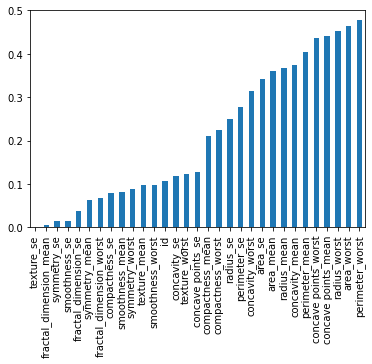

In [ ]:
importances.sort_values().plot.bar() # сортируем и рисуем столбиковую диаграмму

Какой вывод можно сделать?

Слева направо по возрастанию идет степень взаимной информации между указанным параметром и диагнозом. Наименьшая степень - между текстурой и диагнозом, наибольшая - между perimeter worst (плохим периметром) и диагнозом. Для предсказания значения случайной величины параметра "диагноз" наиболее обоснованно использовать значение следующих параметров, составляющие наибольшее значение MI по отношению к диагнозу: perimeter worst; area_worst; radius_worst; concave points_mean; concave points_worst.

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
select = SelectPercentile(percentile=50)

In [ ]:
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
X_train_selected = select.transform(X_train)

In [ ]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (398, 31)
форма массива X_train_selected: (398, 15)


In [ ]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))

Правильность со всеми признаками: 0.632


In [ ]:
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(lr.score(X_test_selected, y_test)))

Правильность только с отобранными признаками: 0.988


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Таким образом мы отобрали 15 признаков, наиболее коррелирующих со значением диагноза. f_classif было использовано по умолчанию. Мы провели одномерный отбор признаков, то есть взаимосвязь каждого признака со значением диагноза была посчитана в отдельности, если же какие-то признаки в совокупности влияли на изменение диагноза, это данным методом отбора не учитывается.

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))

форма обуч набора X: (398, 31)


In [ ]:
print("форма обуч набора X c l1: {}".format(X_train_l1.shape))

форма обуч набора X c l1: (398, 16)


In [ ]:
X_test_l1 = select.transform(X_test)

In [ ]:
score = LogisticRegression().fit(X_train_l1, y_train).score(X_train_l1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.940


Отбор признаков на основе модели показал более низкую правильность, чем одномерный отор признаков. Это может быть связано с тем, что моделью было отобрано больше признаков (16, а не 15).

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

In [ ]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)

In [ ]:
X_train_rfe=select.transform(X_train)

In [ ]:
X_test_rfe=select.transform(X_test)

In [ ]:
score=LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.977


Итеративный отбор признаков показал точность выше, чем отбор признаков на основе модели, но ниже, чем одномерный отбор.